## Trending analysis of music preferences

#### Import library and package

In [5]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from matplotlib.figure import Figure 
from wordcloud import WordCloud

#### Load data

In [6]:
df_normal  = pd.read_csv('list_info.csv') # Load các thông tin các video về âm nhạc thường
df_normal.head()


,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,116722,NaN,NaN,0,25.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H13M25S,2d,...,False,public,True,False,72435,NaN,NaN,0,39.0,['https://en.wikipedia.org/wiki/Electronic_mus...
2,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc trẻ remix', 'nhạc remix', 'nhac tre rem...",10,NaN,PT1H20M44S,2d,...,False,public,True,False,80223,NaN,NaN,0,25.0,['https://en.wikipedia.org/wiki/Electronic_mus...
3,zNOA_dLU3NM,2022-06-29T09:49:28Z,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,Nhạc Trẻ Ballad Việt Hay Nhất 2022 | Lk Nhạc T...,ACV Ballad,"['acv', 'acv ballad', 'nhạc trẻ', 'nhac tre', ...",22,NaN,PT1H36M33S,2d,...,False,public,True,False,1750,14.0,NaN,0,0.0,['https://en.wikipedia.org/wiki/Music']
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,186132,741.0,NaN,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."


In [7]:
# Xem thông tin tổng quan về data frame
df_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1160 non-null   object 
 1   publishAt             1160 non-null   object 
 2   title                 1160 non-null   object 
 3   description           1134 non-null   object 
 4   channelTitle          1160 non-null   object 
 5   tags                  1068 non-null   object 
 6   categoryId            1160 non-null   int64  
 7   defaultAudioLanguage  624 non-null    object 
 8   duration              1160 non-null   object 
 9   dimension             1160 non-null   object 
 10  definition            1160 non-null   object 
 11  caption               1160 non-null   bool   
 12  privacyStatus         1160 non-null   object 
 13  embeddable            1160 non-null   bool   
 14  madeForKids           1160 non-null   bool   
 15  viewCount            

In [8]:
# Filter out music videos ie categoryId is 10 – Music
df_normal = df_normal[df_normal['categoryId']==10]

In [9]:
# Handling null values ​​in data frames
df_normal_preprocessed = df_normal.fillna({'description':'', 'tags':'', 'defaultAudioLanguage':'', 'likeCount':0, 'dislikeCount':0, 'commentCount':0, 'topicCategories':'' })
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv trending', 'acv', 'nhac tre moi nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,116722,0.0,0.0,0,25.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...",10,vi,PT1H13M25S,2d,...,False,public,True,False,72435,0.0,0.0,0,39.0,['https://en.wikipedia.org/wiki/Electronic_mus...
2,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc trẻ remix', 'nhạc remix', 'nhac tre rem...",10,,PT1H20M44S,2d,...,False,public,True,False,80223,0.0,0.0,0,25.0,['https://en.wikipedia.org/wiki/Electronic_mus...
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,186132,741.0,0.0,0,18.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
5,dWkUYZ4nZT0,2022-06-29T01:30:25Z,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,RIN Music,"['rin music', 'rin music remix', 'nhạc trẻ rem...",10,vi,PT1H8M46S,2d,...,False,public,True,False,25882,0.0,0.0,0,26.0,['https://en.wikipedia.org/wiki/Electronic_mus...


In [10]:
# Mô tả các thuộc tính có giá trị nguyên
df_normal.describe()

,categoryId,viewCount,likeCount,dislikeCount,favoriteCount,commentCount
count,842.0,8.420000e+02,6.910000e+02,0.0,842.0,8.400000e+02
mean,10.0,3.930117e+06,9.625743e+04,NaN,0.0,6.575640e+03
std,0.0,2.408939e+07,8.100291e+05,NaN,0.0,1.232741e+05
min,10.0,1.000000e+00,1.000000e+00,NaN,0.0,0.000000e+00
25%,10.0,5.137250e+04,1.024000e+03,NaN,0.0,1.200000e+01
50%,10.0,2.707855e+05,3.824000e+03,NaN,0.0,5.550000e+01
75%,10.0,1.221521e+06,1.806850e+04,NaN,0.0,2.482500e+02
max,10.0,5.065690e+08,1.662494e+07,NaN,0.0,3.510738e+06


In [11]:
# Draw a statistical pie chart according to the number of views of the videos
def pieCharViewCounts(df):
    listVideo_10KView = df[df['viewCount']<100000]['id']
    listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
    listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
    listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
    listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']

    y = np.array([len(listVideo_10KView),
                    len(listVideo_100KView),
                    len(listVideo_1MView),
                    len(listVideo_10MView),
                    len(listVideo_100MView),
                ])
    mylabel = ['Video 10 thousand views', 'Video 100 thousand views', 'Video million views', 'Video 10 million views', 'Video 100 million views']
   
    fig = plt.figure()
    fig.patch.set_facecolor('white')
    plt.pie(y, labels=mylabel)
    plt.show()

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


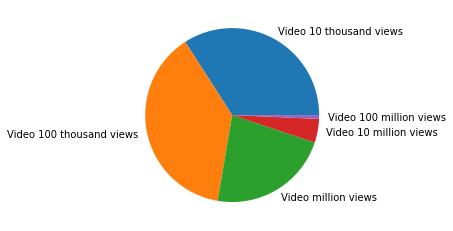

In [12]:
pieCharViewCounts(df_normal)

#### Xử lý tag và tên channel (thêm "_" vào các tag)


In [13]:
df_normal_preprocessed['tags'].fillna('', inplace=True)

In [14]:
def removeSpace(listItems, noise):
    tagsPreprocessed = []
    for item in listItems:
        if item == noise:
            tagsPreprocessed.append(item)
            continue
        item = item.replace(' ','_')
        item = item.replace(',_',', ')
        tagsPreprocessed.append(item)
    # print(tagsPreprocessed)
    return tagsPreprocessed

In [15]:
print(df_normal_preprocessed['tags'])
tagsPreprocessed = removeSpace(df_normal_preprocessed['tags'], ' ')
# df_normal_preprocessed.drop(columns=['tags'])
# df_normal_preprocessed.assign(tags = tagsPreprocessed)
# print(df_normal_preprocessed['tags'])
# print(tagsPreprocessed)
df_normal_preprocessed['tags'] = tagsPreprocessed

0       ['acv trending', 'acv', 'nhac tre moi nhat', '...
1       ['orinn remix', 'nhạc trẻ', 'nhac tre', 'nhạc ...
2       ['nhạc trẻ remix', 'nhạc remix', 'nhac tre rem...
4       ['tuyển tập nhạc trẻ', 'nhạc trẻ hay nhất', 'n...
5       ['rin music', 'rin music remix', 'nhạc trẻ rem...
                              ...                        
1153    ['lofi hip hop', 'lofi hiphop', 'lofi mix', 'l...
1154    ['White music', 'whitemusic', 'tiktok lofi', '...
1155    ['Fallinluv', 'Music', 'Us-Uk', 'fallinluvchal...
1156    ['lofi', 'Chill', 'chillout', 'chill music', '...
1157    ['lofi', 'Chill', 'chillout', 'chill music', '...
Name: tags, Length: 842, dtype: object


#### Handling topic categories

In [16]:
df_normal_preprocessed['topicCategories'] = df_normal['topicCategories'].fillna('')

In [17]:
listTopics=[]
for index, row in df_normal_preprocessed.iterrows():
    listTopic = row['topicCategories']
    if listTopic == '':
        listTopics.append(listTopic)
        continue
    topicStr = ''
    listTopic = listTopic.replace('https://en.wikipedia.org/wiki/','')
    listTopic = listTopic.replace("'Music'",'')
    listTopic = listTopic.replace(',','')
    listTopic = listTopic.replace('[','')
    listTopic = listTopic.replace(']','')
    listTopic = listTopic.replace('\'','')
    print(listTopic)
    listTopics.append(listTopic)
    #     #topic = topic.removesuffix("https://en.wikipedia.org/wiki/")
    #     print(topic)

print(type(listTopics))

 Pop_music
Electronic_music 
Electronic_music  Pop_music
 Music_of_Asia Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music 
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
 Pop_music
 Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music 
Classical_music Electronic_music 
Electronic_music 
Electronic_music  Pop_music

 Performing_arts
 Music_of_Asia Pop_music

 Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Pop_music
Electronic_music 
Electronic_music  Music_of_Asia
Electronic_music 

Electronic_music  Pop_music
Electronic_music  Music_of_Asia
 Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
Electronic_music  Pop_music
 Pop_music
Electronic_music  Music_of_Asia Pop_music




Electronic_music  Pop_music
 Music_of_Asia
 Music_of_Asia Pop_music
 Music_of_Asia Pop_music
Electronic_music  Pop_music
 Pop_music
 Music_of_Asia
 Music_of_Asia Pop_music
 Music_of_Asia Pop_mu

In [18]:
df_normal_preprocessed['topicCategories'] = listTopics
df_normal_preprocessed

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,caption,privacyStatus,embeddable,madeForKids,viewCount,likeCount,dislikeCount,favoriteCount,commentCount,topicCategories
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,False,public,True,False,116722,0.0,0.0,0,25.0,Pop_music
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H13M25S,2d,...,False,public,True,False,72435,0.0,0.0,0,39.0,Electronic_music
2,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc_trẻ_remix', 'nhạc_remix', 'nhac_tre_rem...",10,,PT1H20M44S,2d,...,False,public,True,False,80223,0.0,0.0,0,25.0,Electronic_music Pop_music
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,True,public,True,False,186132,741.0,0.0,0,18.0,Music_of_Asia Pop_music
5,dWkUYZ4nZT0,2022-06-29T01:30:25Z,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,RIN Music,"['rin_music', 'rin_music_remix', 'nhạc_trẻ_rem...",10,vi,PT1H8M46S,2d,...,False,public,True,False,25882,0.0,0.0,0,26.0,Electronic_music Pop_music
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,UMhOGEo8O5A,2021-07-26T15:39:32Z,Last breeze of the evening ● lofi hip hop mix ...,▢ Lofi beats beats to relax / study to\n▢ Stre...,Dreamy,"['lofi_hip_hop', 'lofi_hiphop', 'lofi_mix', 'l...",10,en,PT55M9S,2d,...,False,public,True,False,1186562,26433.0,0.0,0,545.0,Electronic_music
1154,0wNODgs_C0A,2022-01-21T11:18:38Z,Bài Hát Tiếng Anh Cover ✨ Những Bản Cover Hay ...,Bài Hát Tiếng Anh Cover ✨ Những Bản Cover Hay ...,White music,"['White_music', 'whitemusic', 'tiktok_lofi', '...",10,vi,PT33M29S,2d,...,True,public,True,False,660609,13992.0,0.0,0,109.0,Electronic_music Pop_music
1155,n4ws6wXVKW0,2021-01-30T13:53:06Z,"Top 15 Best Lo-fi Remix by Gustixa, Fasetya (P...",⭐ Follow 𝑭𝒂𝒍𝒍 𝑰𝒏 𝑳𝒖𝒗:\n☘ Subscribe: https://ww...,Fall In Luv,"['Fallinluv', 'Music', 'Us-Uk', 'fallinluvchal...",10,en,PT40M51S,2d,...,False,public,True,False,2023825,44241.0,0.0,0,381.0,Pop_music
1156,EOilfXpzCm0,2021-09-27T11:00:06Z,Những Bài Hát Lofi Tiếng Anh Cực Chill Hot Nhấ...,🎧 Lofi / Chill Vibes 🎧\n\n☕ Buy Me a Coffee:\n...,#Musikrimix,"['lofi', 'Chill', 'chillout', 'chill_music', '...",10,vi,PT1H6M35S,2d,...,False,public,True,False,454541,7177.0,0.0,0,161.0,Pop_music


#### Handling time

In [19]:
def convertHour(str):
    if str.find('H') == -1:
        return 0
    hour = str.split('T')[1].split('H')[0]
    return hour

def convertMinute(str):
    if str.find('M') == -1:
        return 0
    if str.find('H') != -1:
        minute = str.split('H')[1].split('M')[0]
    else:
        minute = str.split('T')[1].split('M')[0]
    return minute

def convertSecond(str):
    if str.find('S') == -1:
        return 0
    if str.find('M') == -1:
        if str.find('H') == -1:
            second = str.split('T')[1].split('S')[0]
        else:    
            second = str.split('H')[1].split('S')[0]
    else:
        second = str.split('M')[1].split('S')[0]
    return second

In [20]:
hours, minutes, seconds = [], [], []
years, months, days = [], [], []
durationInt = []
for index, row in df_normal.iterrows():
    hours.append(int(convertHour(row['duration'])))
    minutes.append(int(convertMinute(row['duration'])))
    seconds.append(int(convertSecond(row['duration'])))
    years.append(int(row['publishAt'].split('-',1)[0]))
    months.append(int(row['publishAt'].split('-',1)[1].split('-',1)[0]))
    days.append(int(row['publishAt'].split('-',2)[2].split('T')[0]))
    durationInt.append(hours[-1]*60*60+minutes[-1]*60+seconds[-1])

In [21]:
df_normal_preprocessed = df_normal_preprocessed.assign(hourDuration=hours, minuteDuration=minutes, secondDuration=seconds, yearPublished=years, monthPublished=months, dayPublished=days, durationInt = durationInt)
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,0,25.0,Pop_music,1,38,44,2022,6,27,5924
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H13M25S,2d,...,0,39.0,Electronic_music,1,13,25,2022,6,29,4405
2,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc_trẻ_remix', 'nhạc_remix', 'nhac_tre_rem...",10,,PT1H20M44S,2d,...,0,25.0,Electronic_music Pop_music,1,20,44,2022,6,28,4844
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635
5,dWkUYZ4nZT0,2022-06-29T01:30:25Z,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,RIN Music,"['rin_music', 'rin_music_remix', 'nhạc_trẻ_rem...",10,vi,PT1H8M46S,2d,...,0,26.0,Electronic_music Pop_music,1,8,46,2022,6,29,4126


#### Handling name of video

In [22]:
# Function to remove some interfering words
def removeStopword(texts, stopwords):
    tmpList = []
    for text in texts:
        text = text.lower()
        for stopword in stopwords:
            text = text.replace(stopword,'')
        tmpList.append(text)
    return tmpList

#### Process column values to integers

In [23]:
le_captions = preprocessing.LabelEncoder()
le_captions.fit(df_normal['caption'])
df_normal_preprocessed['caption'] = le_captions.transform(df_normal['caption'])

le_embeddables = preprocessing.LabelEncoder()
le_embeddables.fit(df_normal['embeddable'])
df_normal_preprocessed['embeddable'] = le_embeddables.transform(df_normal['embeddable'])

le_madeForKids = preprocessing.LabelEncoder()
le_madeForKids.fit(df_normal['madeForKids'])
df_normal_preprocessed['madeForKids'] = le_madeForKids.transform(df_normal['madeForKids'])

le_privacyStatus = preprocessing.LabelEncoder()
le_privacyStatus.fit(df_normal['privacyStatus'])
df_normal_preprocessed['privacyStatus'] = le_privacyStatus.transform(df_normal['privacyStatus'])

le_definitions = preprocessing.LabelEncoder()
le_definitions.fit(df_normal['definition'])
df_normal_preprocessed['definition'] = le_definitions.transform(df_normal['definition'])

In [24]:
df_normal_preprocessed.head()

,id,publishAt,title,description,channelTitle,tags,categoryId,defaultAudioLanguage,duration,dimension,...,favoriteCount,commentCount,topicCategories,hourDuration,minuteDuration,secondDuration,yearPublished,monthPublished,dayPublished,durationInt
0,_7UyRLB1HVg,2022-06-27T09:33:26Z,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...,ACV Music Trending,"['acv_trending', 'acv', 'nhac_tre_moi_nhat', '...",10,vi,PT1H38M44S,2d,...,0,25.0,Pop_music,1,38,44,2022,6,27,5924
1,CRW2YqJs-J4,2022-06-29T01:00:01Z,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...,Orinn Remix,"['orinn_remix', 'nhạc_trẻ', 'nhac_tre', 'nhạc_...",10,vi,PT1H13M25S,2d,...,0,39.0,Electronic_music,1,13,25,2022,6,29,4405
2,8-933tJOtSY,2022-06-28T22:59:50Z,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...,Min Xinh,"['nhạc_trẻ_remix', 'nhạc_remix', 'nhac_tre_rem...",10,,PT1H20M44S,2d,...,0,25.0,Electronic_music Pop_music,1,20,44,2022,6,28,4844
4,yJFTFdgH5Bc,2022-05-22T03:00:18Z,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...,TPT Music For Life,"['tuyển_tập_nhạc_trẻ', 'nhạc_trẻ_hay_nhất', 'n...",10,vi,PT2H57M15S,2d,...,0,18.0,Music_of_Asia Pop_music,2,57,15,2022,5,22,10635
5,dWkUYZ4nZT0,2022-06-29T01:30:25Z,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...,RIN Music,"['rin_music', 'rin_music_remix', 'nhạc_trẻ_rem...",10,vi,PT1H8M46S,2d,...,0,26.0,Electronic_music Pop_music,1,8,46,2022,6,29,4126


##### Distribution of videos by number of views, like

(array([685.,   2.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.]),
 array([1.0000000e+00, 1.6624950e+06, 3.3249890e+06, 4.9874830e+06,
        6.6499770e+06, 8.3124710e+06, 9.9749650e+06, 1.1637459e+07,
        1.3299953e+07, 1.4962447e+07, 1.6624941e+07]),
 <BarContainer object of 10 artists>)

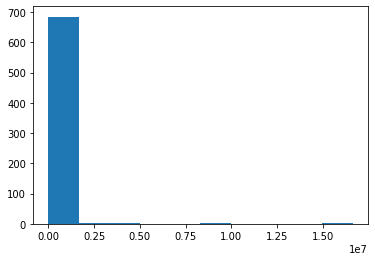

In [25]:
plt.hist(df_normal['likeCount'])

(array([460.,  69.,  32.,  16.,  19.,  14.,  12.,   8.,   4.,   3.]),
 array([1.00000e+00, 9.96190e+03, 1.99228e+04, 2.98837e+04, 3.98446e+04,
        4.98055e+04, 5.97664e+04, 6.97273e+04, 7.96882e+04, 8.96491e+04,
        9.96100e+04]),
 <BarContainer object of 10 artists>)

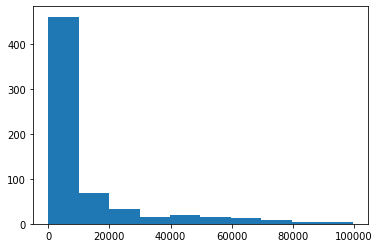

In [26]:
plt.hist(df_normal[df_normal['likeCount']<1e5]['likeCount'])

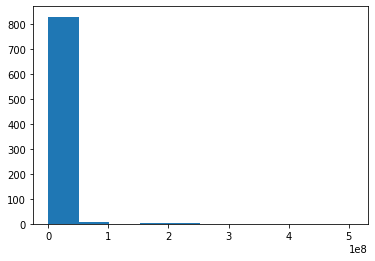

In [27]:
plt.hist(df_normal['viewCount']);

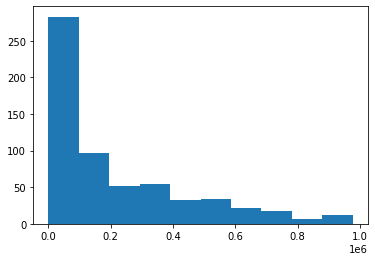

In [28]:
plt.hist(df_normal[df_normal['viewCount']<1e6]['viewCount']);

(array([766.,  71.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([    0. ,  7794.2, 15588.4, 23382.6, 31176.8, 38971. , 46765.2,
        54559.4, 62353.6, 70147.8, 77942. ]),
 <BarContainer object of 10 artists>)

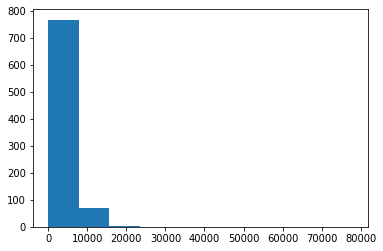

In [29]:
plt.hist(df_normal_preprocessed['durationInt'])

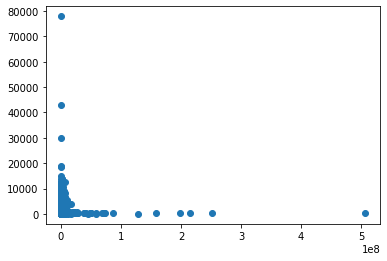

In [30]:
plt.scatter(df_normal_preprocessed['viewCount'], df_normal_preprocessed['durationInt'])

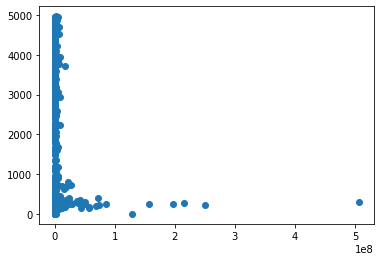

In [31]:
plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3]['durationInt'])

/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/1613510240.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])


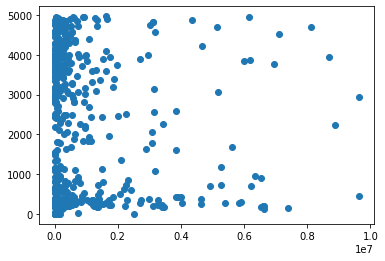

In [32]:

plt.scatter(df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['viewCount'], df_normal_preprocessed[ df_normal_preprocessed['durationInt']<5e3][df_normal_preprocessed['viewCount']<1e7]['durationInt'])

##### The relationship between attributes

In [33]:
corr = df_normal_preprocessed.corr()
print(df_normal_preprocessed.head(5))

            id             publishAt  \
0  _7UyRLB1HVg  2022-06-27T09:33:26Z   
1  CRW2YqJs-J4  2022-06-29T01:00:01Z   
2  8-933tJOtSY  2022-06-28T22:59:50Z   
4  yJFTFdgH5Bc  2022-05-22T03:00:18Z   
5  dWkUYZ4nZT0  2022-06-29T01:30:25Z   

                                               title  \
0  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...   
1  NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...   
2  EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...   
4  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...   
5  Top 20 Bài Hát Hot Nhất Trên TikTok 2022 💘 Nhạ...   

                                         description        channelTitle  \
0  Nhạc Trẻ Mới Hay Nhất 2022 - Liên Khúc Nhạc Tr...  ACV Music Trending   
1  NHẠC TRẺ REMIX 2022 HAY NHẤT HIỆN NAY - EDM Ti...         Orinn Remix   
2  EDM TikTok Hay 2022 ♫ BXH Nhạc Trẻ Remix Hay N...            Min Xinh   
4  TOP 40 Bài Hát Nhạc Trẻ Hàng Triệu View Hay Nh...  TPT Music For Life   
5  Top 20 Bài Hát Hot Nhất Trên TikTok 202

In [34]:
df_normal_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 1157
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    842 non-null    object 
 1   publishAt             842 non-null    object 
 2   title                 842 non-null    object 
 3   description           842 non-null    object 
 4   channelTitle          842 non-null    object 
 5   tags                  842 non-null    object 
 6   categoryId            842 non-null    int64  
 7   defaultAudioLanguage  842 non-null    object 
 8   duration              842 non-null    object 
 9   dimension             842 non-null    object 
 10  definition            842 non-null    int64  
 11  caption               842 non-null    int64  
 12  privacyStatus         842 non-null    int64  
 13  embeddable            842 non-null    int64  
 14  madeForKids           842 non-null    int64  
 15  viewCount             

<AxesSubplot:>

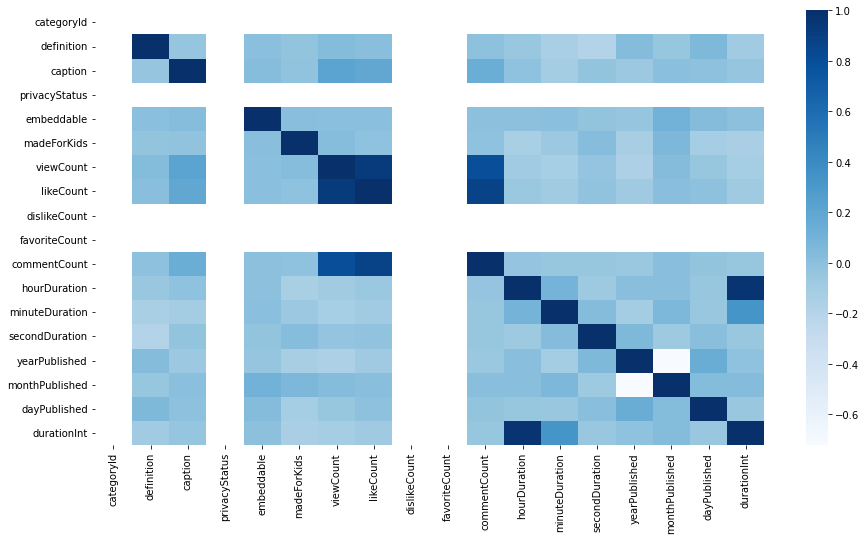

In [35]:
plt.figure(figsize=(15,8))
heatmap_df_normal_preprocess = df_normal_preprocessed[['viewCount','likeCount','dislikeCount','commentCount', 'favoriteCount']]
corr = df_normal_preprocessed.corr()
sns.heatmap(corr, cmap='Blues')

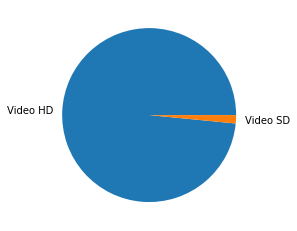

In [36]:
# plt.figure(figsize=(8,16))

# plt.scatter(df_normal_preprocessed['definition'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

hd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
sd_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([hd_videos.shape[0], sd_videos.shape[0]])
mylabel = ['Video HD', 'Video SD']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

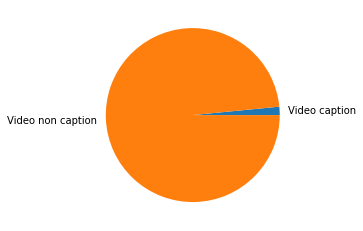

In [37]:
# plt.scatter(df_normal_preprocessed['caption'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Caption')
# plt.xlabel('Caption')
# plt.ylabel('View count')

df_normal['caption'].unique()

caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_caption_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([caption_videos.shape[0], non_caption_videos.shape[0]])
mylabel = ['Video caption', 'Video non caption']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

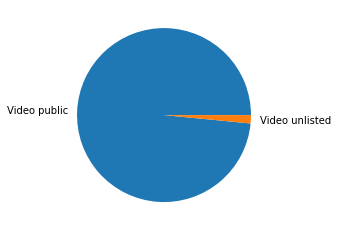

In [38]:
# plt.scatter(df_normal_preprocessed['privacyStatus'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

df_normal['privacyStatus'].unique()

public_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]
unlisted_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]

y = np.array([public_videos.shape[0], unlisted_videos.shape[0]])
mylabel = ['Video public', 'Video unlisted']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

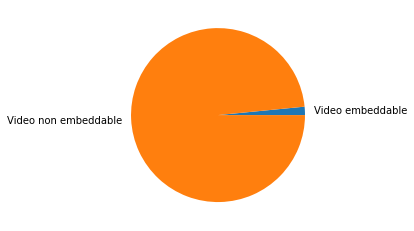

In [39]:
# plt.scatter(df_normal_preprocessed['embeddable'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['embeddable'].unique()

embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_embeddable_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([embeddable_videos.shape[0], non_embeddable_videos.shape[0]])
mylabel = ['Video embeddable', 'Video non embeddable']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

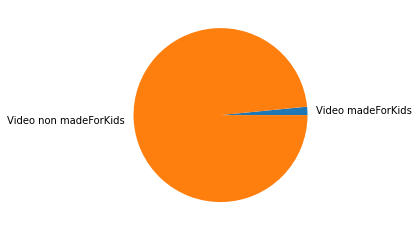

In [40]:
# plt.scatter(df_normal_preprocessed['madeForKids'], df_normal_preprocessed['viewCount'])
# plt.title('View count - Definition')
# plt.xlabel('Definition')
# plt.ylabel('View count')

# df_normal['madeForKids'].unique()
# test = df_normal[df_normal['madeForKids']==False]
madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==1]
non_madeForKids_videos = df_normal_preprocessed[df_normal_preprocessed['definition']==0]

y = np.array([madeForKids_videos.shape[0], non_madeForKids_videos.shape[0]])
mylabel = ['Video madeForKids', 'Video non madeForKids']
   
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie(y, labels=mylabel)
plt.show()

#### Convert text to vector IF TDF

In [41]:
def convertIfTdf(df, column, stopwords):
    data_train = df[column]
    data_train = removeStopword(data_train, stopwords)

    module_count_vector = TfidfVectorizer(stop_words=stopwords)
    model_rf_preprocess = Pipeline([('vect', module_count_vector),
                        ('tfidf', TfidfTransformer()),
                        ])
    # Hàm thực hiện chuyển đổi dữ liệu text thành dữ liệu số dạng ma trận 
    # Input: Dữ liệu 2 chiều dạng numpy.array, mảng nhãn id dạng numpy.array 
    data_preprocessed = module_count_vector.fit_transform(data_train)

    print(f"\nNumber of words in the dictionary: {len(module_count_vector.vocabulary_)}")
    print(f"Data size after processing: {data_preprocessed.shape}")
    print(f"View the words in the dictionary: {module_count_vector.vocabulary_}")
    print(type(data_preprocessed))
    return data_preprocessed


In [42]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X = convertIfTdf(df_normal_preprocessed,'title', stopwords)
print(type(X))


Number of words in the dictionary: 1777
Data size after processing: (842, 1777)
View the words in the dictionary: {'trẻ': 1444, 'mới': 878, 'hay': 508, 'nhất': 961, '2022': 31, 'liên': 709, 'khúc': 644, 'hiện': 521, 'nay': 888, 'chọn': 264, '129': 14, 'remix': 1167, 'edm': 406, 'tiktok': 1387, 'orinn': 1038, 'lk': 711, 'bxh': 161, 'top': 1406, '15': 17, 'bản': 185, '40': 54, 'hàng': 545, 'triệu': 1419, 'view': 1543, 'bảng': 186, 'xếp': 1633, 'hạng': 566, 'hits': 518, '20': 28, 'hot': 529, 'trên': 1427, 'trend': 1415, 'được': 1702, 'sử': 1290, 'dụng': 402, 'nhiều': 947, '35': 53, 'nonstop': 982, 'bass': 123, 'cực': 347, 'mạnh': 860, 'việt': 1550, 'mix': 821, 'dj': 367, 'vinahouse': 1545, 'say': 1213, 'thì': 1345, 'cứ': 346, 'yêu': 1643, 'bỏ': 199, 'đi': 1667, 'thất': 1364, 'tình': 1480, 'cấm': 332, 'nghe': 899, 'về': 1586, 'đêm': 1686, 'đế': 1724, 'vương': 1576, 'ai': 86, 'chung': 227, 'mãi': 843, '2021': 30, '29': 43, 'không': 643, 'trọn': 1448, 'vẹn': 1584, 'nữa': 1023, 'từng': 1522,

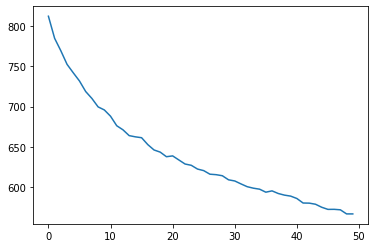

In [43]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
loss = []
for i in range(50):
    i = i + 1
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    loss.append(kmeans.inertia_)
plt.plot(range(50), loss)

In [44]:
clustering = KMeans(n_clusters=10,init='k-means++', random_state=0).fit(X)
clustering.cluster_centers_

array([[0.00053993, 0.00067636, 0.00077709, ..., 0.00129451, 0.00092401,
        0.00092401],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [45]:
label = clustering.labels_
print(label.shape)
for i in label:
    print(i)

(842,)
1
1
1
7
1
1
1
1
0
0
0
7
1
1
1
8
1
0
1
9
0
0
7
1
0
1
1
0
0
1
8
7
0
0
1
1
1
1
0
1
0
0
9
2
0
0
0
1
9
9
9
0
9
9
9
0
9
9
9
9
9
0
9
9
9
9
9
9
9
0
9
9
9
1
0
3
0
3
9
1
9
9
3
0
0
9
9
3
9
3
9
0
0
0
9
5
3
5
0
0
9
0
0
3
9
0
0
9
9
9
3
0
9
0
0
9
9
9
0
9
0
3
9
1
1
9
0
0
0
9
9
3
9
0
0
3
3
9
9
0
0
0
0
0
9
1
9
0
9
0
3
0
3
0
0
0
9
1
0
0
0
1
9
9
0
9
9
9
0
0
0
0
0
9
0
0
9
0
0
9
0
9
0
0
0
9
1
0
3
0
0
0
3
0
9
0
1
0
9
9
0
0
0
0
0
0
0
9
0
0
0
0
9
9
0
0
9
0
9
9
0
0
0
9
0
0
0
9
0
0
0
0
0
9
0
0
9
0
9
0
0
0
0
9
0
0
9
9
9
0
9
0
9
0
9
0
0
0
9
0
0
1
0
9
0
9
9
0
9
9
9
0
0
0
0
0
0
0
0
9
0
1
0
0
9
0
0
0
0
0
0
0
0
0
0
0
0
9
0
0
9
0
9
0
9
0
9
0
0
0
0
0
8
8
8
8
0
0
0
0
8
1
0
8
0
0
0
8
8
8
2
8
1
1
0
0
0
0
1
8
1
0
1
1
1
1
1
1
8
0
1
8
1
1
8
1
8
1
2
8
0
8
8
5
9
0
9
0
0
0
8
2
2
0
9
0
1
1
1
1
0
5
0
0
0
0
1
9
0
1
0
1
1
3
8
2
0
8
9
8
8
1
0
3
9
8
0
8
8
9
8
0
1
0
0
0
2
0
0
1
8
1
8
0
0
0
0
0
1
1
1
0
0
0
0
8
1
0
0
0
0
9
0
7
9
7
7
0
8
7
5
0
6
0
0
0
0
0
7
7
0
9
5
0
0
0
0
0
0
9
0
0
0
7
7
0
0
0
0
0
9
0
0
0
7
0
0
7
0
0
0
6
5
0
5
9
0

In [46]:
temp_df = df_normal_preprocessed.assign(label=label)
temp_df = temp_df.assign(topics = listTopics)
temp_df.info()

for i in range(len(np.unique(label))):
    print(i)
    filter_df = temp_df[label==i]
    filter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 842 entries, 0 to 1157
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    842 non-null    object 
 1   publishAt             842 non-null    object 
 2   title                 842 non-null    object 
 3   description           842 non-null    object 
 4   channelTitle          842 non-null    object 
 5   tags                  842 non-null    object 
 6   categoryId            842 non-null    int64  
 7   defaultAudioLanguage  842 non-null    object 
 8   duration              842 non-null    object 
 9   dimension             842 non-null    object 
 10  definition            842 non-null    int64  
 11  caption               842 non-null    int64  
 12  privacyStatus         842 non-null    int64  
 13  embeddable            842 non-null    int64  
 14  madeForKids           842 non-null    int64  
 15  viewCount             

In [47]:
def drawWordCloud(df, column, stopwords):
  for i in range(len(np.unique(label))):
      
      #Extract cleaned text column
      data=df[df['label']==i][column].values
      data = removeStopword(data, stopwords)
      list_of_words=[];
      for sent in data:
        if type(sent)!=str:
          continue
        for word in sent.split():
          list_of_words.append(word)  
      final_text=" ".join(list_of_words)
      wordcloud = WordCloud(collocations=False).generate(final_text)
      plt.figure()
      title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
      plt.title(title)
      plt.imshow(wordcloud, interpolation="bilinear")
      plt.axis("off")
      plt.show()



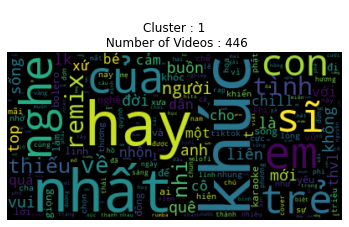

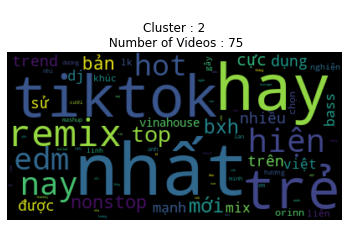

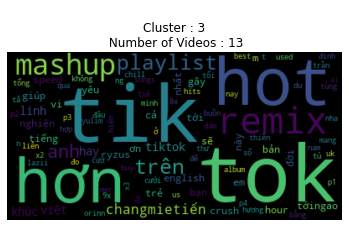

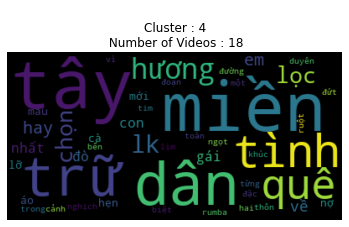

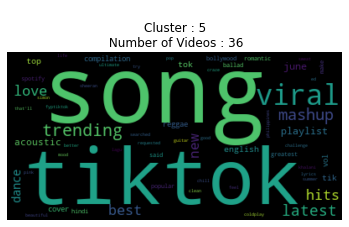

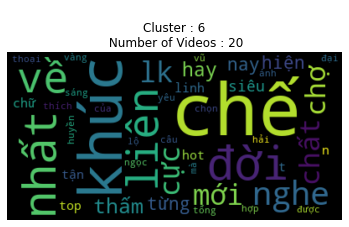

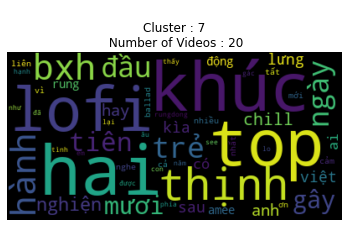

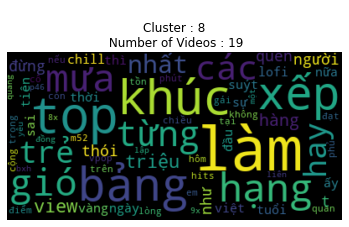

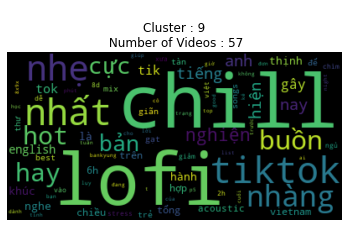

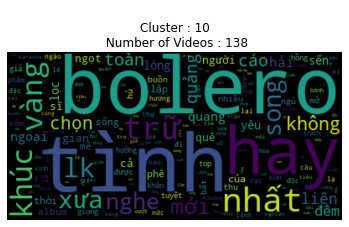

In [48]:
drawWordCloud(temp_df,'title', stopwords)

0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


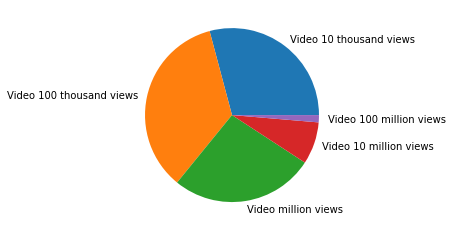

1


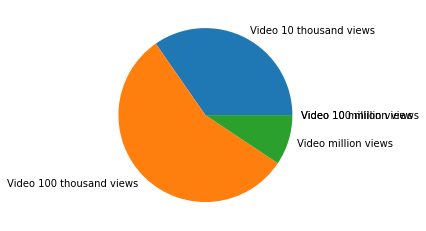

2


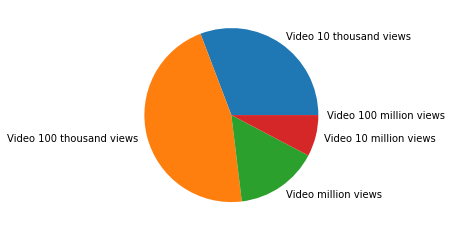

3


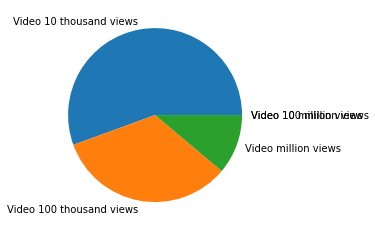

4


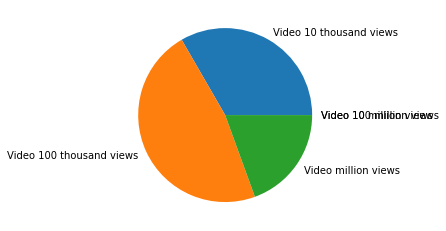

5


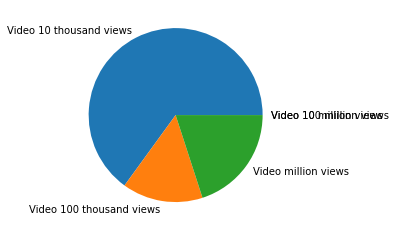

6


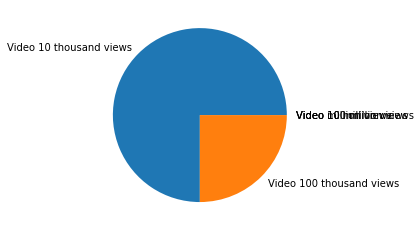

7


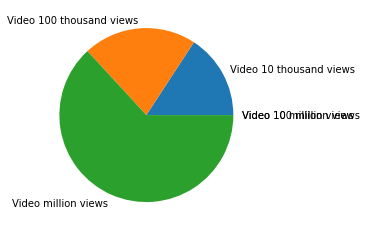

8


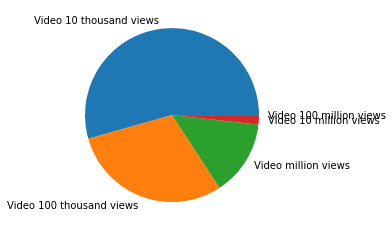

9


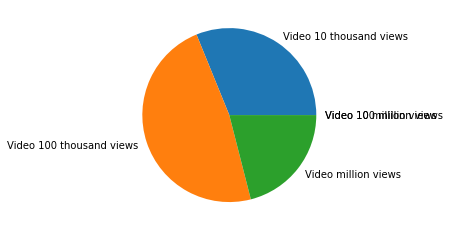

In [49]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(temp_df[temp_df['label']==i])

In [50]:
clustered_df = temp_df.groupby(['label']).sum()

In [51]:
clustered_df[['viewCount', 'likeCount', 'durationInt']]

,viewCount,likeCount,durationInt
label,,,
0,3025294731,62838681.0,1177933
1,38107710,390993.0,352356
2,29202254,227539.0,39683
3,12649389,250162.0,186232
4,31803364,363769.0,97484
5,6816416,245815.0,122738
6,1437925,5473.0,150345
7,22368624,89202.0,141204
8,43622543,517325.0,233894


In [52]:
abnormal_cluster = temp_df[temp_df['label']==6]
# abnormal_cluster = abnormal_cluster[abnormal_cluster['label']==2]

In [53]:
stopwords = [ 'official', 'mv', 'video', 'music', 'nhạc', 'âm', 'hát', 'tuyển', 'tập', 'bài', 'những', 'ca', ' x ', 'ft','feat']
X_abnormal = convertIfTdf(abnormal_cluster,'title', stopwords)
print(type(X_abnormal))
kmeans = KMeans(n_clusters=5,init='k-means++', random_state=0).fit(X_abnormal)
kmeans.cluster_centers_

label = kmeans.labels_

print(label.shape)
for i in label:
    print(i)
abnormal_cluster = abnormal_cluster.assign(label = label)


Number of words in the dictionary: 56
Data size after processing: (20, 56)
View the words in the dictionary: {'top': 44, '30': 2, 'khúc': 20, 'thịnh': 42, 'hành': 18, 'lofi': 24, 'sau': 39, 'lưng': 25, 'anh': 5, 'có': 10, 'ai': 3, 'kìa': 21, 'như': 33, 'đã': 51, 'thấy': 41, 'em': 13, 'bxh': 7, 'hay': 17, '2022': 0, 'nghe': 29, 'nhiều': 32, 'ngày': 31, 'đầu': 53, 'tiên': 43, 'trẻ': 45, 'mới': 28, 'liên': 22, 'nhất': 34, 'ballad': 6, 'rung': 37, 'động': 54, 'see': 40, 'tình': 46, 'gây': 15, 'nghiện': 30, 'được': 52, 'hai': 16, 'mươi': 27, '22': 1, 'amee': 4, 'việt': 48, 'chill': 8, 'phía': 36, 'gác': 14, 'lại': 26, 'âu': 50, 'lo': 23, 'hạnh': 19, 'năm': 35, 'con': 9, 'cảm': 12, 'ơn': 55, 'vì': 49, 'tất': 47, 'cả': 11, 'rungdong': 38}
<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>
(20,)
1
1
3
4
1
0
4
1
0
0
1
0
0
0
3
1
2
0
2
0


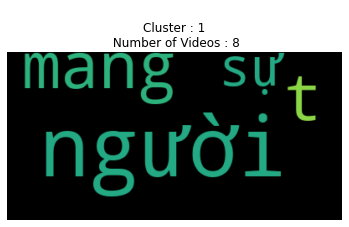

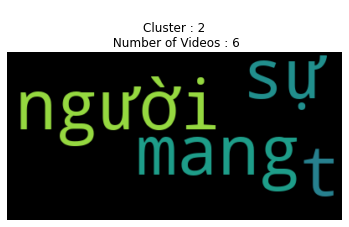

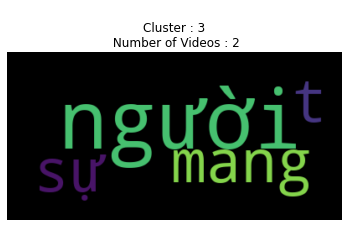

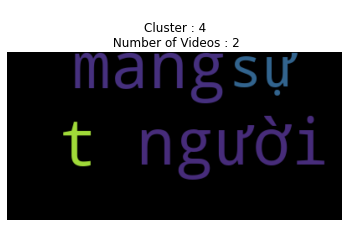

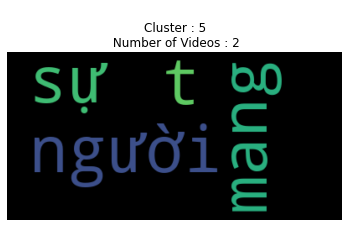

In [54]:
for i in range(len(np.unique(label))):
    
    #Extract cleaned text column
    data=abnormal_cluster[abnormal_cluster['label']==i]['channelTitle'].values
    data = removeStopword(data, stopwords)
    list_of_words=[];
    for sent in data:
      if type(sent)!=str:
        continue
      for word in sent.split():
        list_of_words.append(word)  
    final_text=" ".join(list_of_words)
    wordcloud = WordCloud(collocations=False).generate(final_text)
    plt.figure()
    title="\nCluster : "+str(i+1)+"\n Number of Videos : "+str(len(data))
    plt.title(title)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


0


/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100KView = df[df['viewCount']>=100000][df['viewCount']<1e6]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_1MView = df[df['viewCount']>=1e6][df['viewCount']<1e7]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_10MView = df[df['viewCount']>=1e7][df['viewCount']<1e8]['id']
/var/folders/ms/gfqhw9v15v55931yqg1_j3t80000gn/T/ipykernel_16411/61446148.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  listVideo_100MView = df[df['viewCount']>=1e8][df['viewCount']<1e9]['id']


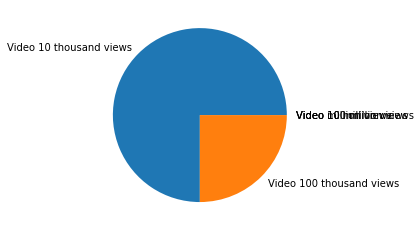

1


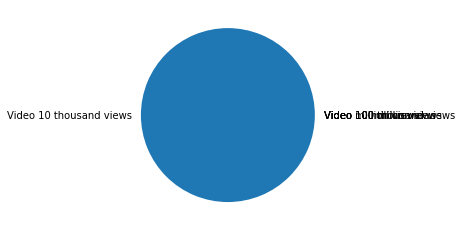

2


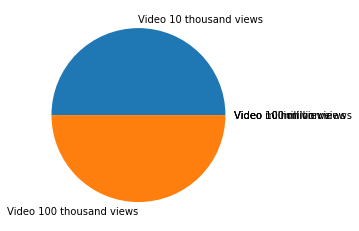

3


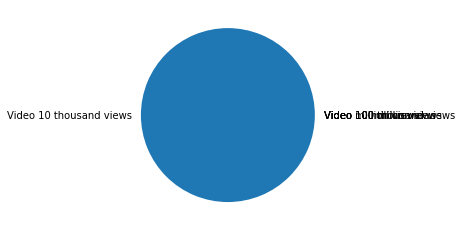

4


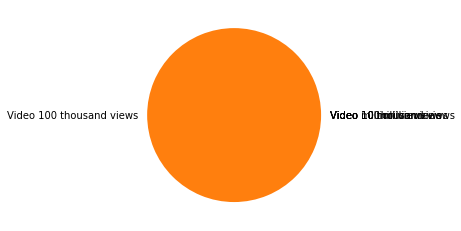

In [55]:
for i in range(len(np.unique(label))):
    print(i)
    pieCharViewCounts(abnormal_cluster[abnormal_cluster['label']==i])

In [56]:
clustered_02_abnormal = abnormal_cluster[abnormal_cluster['label']!=2].sum()
clustered_02_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      1288535
likeCount       5473.0
durationInt     135241
dtype: object

In [57]:
clustered_01_abnormal = abnormal_cluster[abnormal_cluster['label']==2].sum()
clustered_01_abnormal[['viewCount', 'likeCount', 'durationInt']]

viewCount      149390
likeCount         0.0
durationInt     15104
dtype: object

In [58]:
for item in abnormal_cluster[abnormal_cluster['label']==0]['title']:
    print(item)

Hai Mươi Hai 22 Amee - Top 30 Ca Khúc Nhạc Ngày Đầu Tiên Thịnh Hành - BXH Lofi Việt Gây Nghiện CHILL
Ngày Đầu Tiên, Gác Lại Âu Lo ~ Top 30 Ca Khúc Thịnh Hành Hai Mươi Hai - BXH Lofi CHILL Gây Nghiện
22 Hai Mươi Hai Amee - Top 30 Ca Khúc Nhạc Thịnh Hành Ngày Đầu Tiên - BXH Lofi Việt Gây Nghiện CHILL
Top 30 Ca Khúc Thịnh Hạnh - 22 Hai Mươi Hai Amee, Ngày Đầu Tiên - BXH Lofi Việt Gây Nghiện CHILL
Hai Mươi Hai 22 Amee - Top 30 Ca Khúc Nhạc Ngày Đầu Tiên Thịnh Hành - BXH Lofi Việt CHILL Gây Nghiện
Hai Mươi Hai 22 Lofi Ngày Đầu Tiên - Top 30 Ca Khúc Nhạc Thịnh Hành - BXH Lofi CHILL Việt Gây Nghiện
Hai Mươi Hai 22 Ngày Đầu Tiên Lofi - Top 30 Ca Khúc Nhạc Thịnh Hành - BXH Lofi CHILL Việt Gây Nghiện
Hai Mươi Hai 22, Ngày Đầu Tiên, RungDong - Top 30 Ca Khúc Nhạc Thịnh Hành -BXH Lofi CHILL Gây Nghiện


In [59]:
print(wordcloud.words_)

{'người': 1.0, 'mang': 1.0, 't': 1.0, 'sự': 1.0}
